# Digital Image Processing

This notebook provides a basic explanation of digital image representation and simple examples of fundamental functions for image processing using Python and Open CV.

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Step 1: Load an image from a file

In [2]:
image_path = 'images/chess_board.bmp'
# Source: https://commons.wikimedia.org/wiki/File:Affine_Transformation_Original_Checkerboard.jpg

# image_path = 'images/Lena.png'
# Image of Lena Forsén used in many image processing experiments
# Source: https://en.wikipedia.org/wiki/Lenna

original_image = cv2.imread(image_path)

##### Step 2: Display the loaded image in its original format

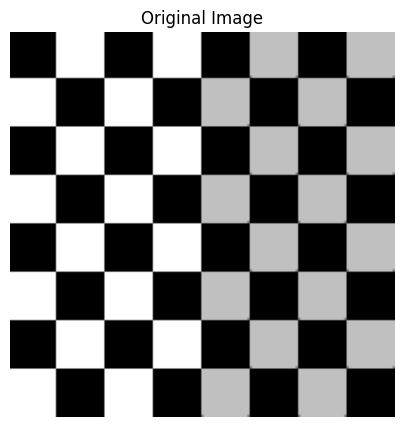

In [3]:
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

A digital image is represented as a matrix that contains the intensity values of its corresponding pixels. In our case, the image is stored as a NumPy array. Color images have 3 channels (Red, Green and Blue), so the array has dimensions (image_height, image_width, 3):

In [4]:
image_shape = original_image.shape   # Get the image size
print(f"Image dimensions = {image_shape}")

Image dimensions = (159, 159, 3)


##### Step 3: Display the Red, Green, and Blue channels as 3 independent images


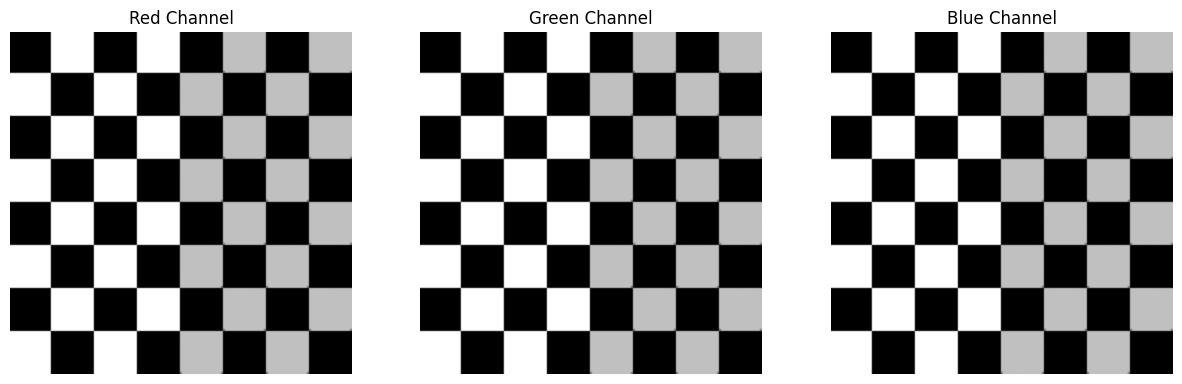

In [5]:
r_channel, g_channel, b_channel = cv2.split(original_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(r_channel, cmap='gray')
# plt.imshow(r_channel, cmap='Reds_r')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g_channel, cmap='gray')
# plt.imshow(g_channel, cmap='Greens_r')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b_channel, cmap='gray')
# plt.imshow(b_channel, cmap='Blues_r')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

##### Step 4: Convert the original image to grayscale and display it


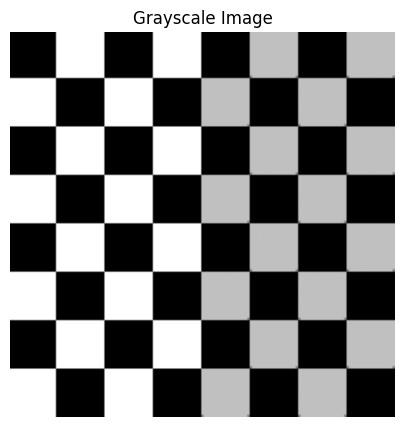

In [6]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

The gray scale image is also an array, but it only has one chanel (gray). Therefore, the dimensions of the array are now (image_height, image_width):

In [7]:
gray_image.shape

(159, 159)

Our image array is composed by 8-bit integer numbers: 
- 0 = lowest intensity (black)
- 255 = highest intensity (white - for a gray scale image)

Check the content around the center of the array:

In [8]:
y1 = int(image_shape[0]/2 - 5)
y2 = int(image_shape[0]/2 + 5)
x1 = int(image_shape[1]/2 - 5)
x2 = int(image_shape[1]/2 + 5)

print(f'Pixels: ({y1}:{y2}, {x1}:{x2})')
print(gray_image[y1:y2,x1:x2])

Pixels: (74:84, 74:84)
[[  0   0   0   0   0 192 192 192 192 192]
 [  0   0   0   0   0 192 192 192 192 192]
 [  0   0   0   0   0 192 192 192 192 192]
 [  0   0   0   0   0 192 192 192 192 192]
 [  0   0   0   0   0 192 192 192 192 192]
 [255 255 255 255 255   0   0   0   0   0]
 [255 255 255 255 255   0   0   0   0   0]
 [255 255 255 255 255   0   0   0   0   0]
 [255 255 255 255 255   0   0   0   0   0]
 [255 255 255 255 255   0   0   0   0   0]]


##### Step 5: Apply a smoothing filter (convolution with a mask) to the grayscale image


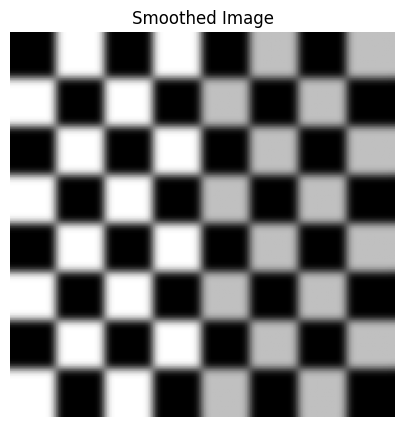

In [9]:
kernel_size = 9
smoothed_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

plt.figure(figsize=(5, 5))
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

Check the values of the same pixels around the center of the image:

In [10]:
print(smoothed_image[y1:y2,x1:x2])

[[  0   3  13  35  74 119 157 179 189 192]
 [  4   7  16  38  75 118 155 177 186 189]
 [ 17  19  28  47  79 117 149 168 177 179]
 [ 47  49  54  67  89 115 137 149 155 157]
 [ 98  98  99 101 106 111 115 117 118 119]
 [157 156 152 142 125 106  89  79  75  74]
 [208 205 197 176 142 101  67  47  38  35]
 [238 235 223 197 152  99  54  28  16  13]
 [251 247 235 205 156  98  49  19   7   3]
 [255 251 238 208 157  98  47  17   4   0]]


##### Step 6: Apply Sobel filter to get the contours

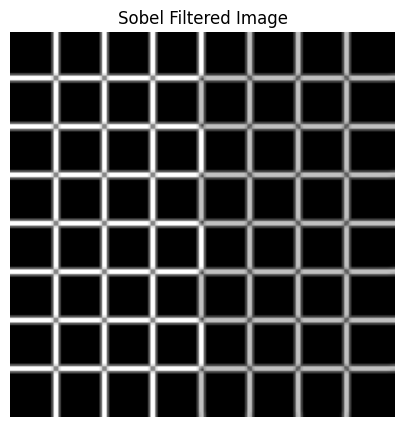

In [11]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(5, 5))
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Filtered Image')
plt.axis('off')
plt.show()

Finally, go back to step 1, change the image path to `image_path = 'images/Lena.png'` and run all the steps again to see the results of the same functions on a real picture.

### Conclusion

After completing this notebook, you should understand the basics of digital image representation, and how to use OpenCV functions to execute simple image processing.

##### Back to the [main page](README.md).